In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dc_bike_hourly = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv', sep=',')

In [3]:
dc_bike_hourly

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


In [4]:
pd.concat([dc_bike_hourly.describe()], axis=1, keys=["DC Hourly Ride"])

DC Hourly Ride                                            \
              Casual          Hour        Member   Total_rides   
count   26269.000000  26280.000000  26269.000000  26269.000000   
mean      159.930070     11.500000    247.165632    407.095702   
std       167.330426      6.922318    225.283539    373.005409   
min         0.000000      0.000000      0.000000      1.000000   
25%        28.000000      5.750000     55.000000     85.000000   
50%       105.000000     11.500000    203.000000    319.000000   
75%       237.000000     17.250000    371.000000    616.000000   
max      1206.000000     23.000000   1534.000000   2262.000000   

                                                                          \
      relativehumidity_2m (%) temperature_2m (°C) weathercode (wmo code)   
count            26280.000000        26280.000000           26280.000000   
mean                62.967884           14.412782               7.228311   
std                 22.724320           10.285751              17.630961   
min                  5.000000          -14.600000               0.000000   
25%                 46.000000            6.100000               0.000000   
50%                 64.000000           14.800000               1.000000   
75%                 82.000000           22.700000               2.000000   
max                100.000000           41.500000              75.000000   

                            
      windspeed_10m (km/h)  
count         26280.000000  
mean             10.171298  
std               5.261033  
min               0.000000  
25%               6.500000  
50%               9.200000  
75%              12.900000  
max              40.100000

In [5]:
dc_bike_hourly.info

<bound method DataFrame.info of        Casual        Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
0        20.0  2021-01-01     0    26.0         46.0                       90   
1        23.0  2021-01-01     1    23.0         46.0                       88   
2        20.0  2021-01-01     2    28.0         48.0                       87   
3         9.0  2021-01-01     3     7.0         16.0                       81   
4         7.0  2021-01-01     4     5.0         12.0                       77   
...       ...         ...   ...     ...          ...                      ...   
26275   132.0  2023-12-31    19   190.0        322.0                       71   
26276   125.0  2023-12-31    20   194.0        319.0                       79   
26277    84.0  2023-12-31    21   137.0        221.0                       80   
26278    83.0  2023-12-31    22   142.0        225.0                       80   
26279    82.0  2023-12-31    23   106.0        188.0                       73

In [6]:
dc_bike_hourly.dropna(inplace=True)

In [7]:
dc_bike_hourly.dtypes

Casual                     float64
Date                        object
Hour                         int64
Member                     float64
Total_rides                float64
relativehumidity_2m (%)      int64
temperature_2m (°C)        float64
weathercode (wmo code)       int64
windspeed_10m (km/h)       float64
dtype: object

In [8]:
unique_values = dc_bike_hourly.nunique()
print("Unique values:\n", unique_values, '\n')

Unique values:
 Casual                      835
Date                       1095
Hour                         24
Member                     1159
Total_rides                1670
relativehumidity_2m (%)      96
temperature_2m (°C)         532
weathercode (wmo code)       13
windspeed_10m (km/h)        332
dtype: int64 



In [9]:
dc_bike_hourly.isnull().sum()
#remove the null values
#dc_bike_hourly = dc_bike_hourly.dropna()


Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
dtype: int64

In [10]:
dc_bike_hourly['Date']= pd.to_datetime(dc_bike_hourly['Date'])
dc_bike_hourly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26269 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26269 non-null  float64       
 1   Date                     26269 non-null  datetime64[ns]
 2   Hour                     26269 non-null  int64         
 3   Member                   26269 non-null  float64       
 4   Total_rides              26269 non-null  float64       
 5   relativehumidity_2m (%)  26269 non-null  int64         
 6   temperature_2m (°C)      26269 non-null  float64       
 7   weathercode (wmo code)   26269 non-null  int64         
 8   windspeed_10m (km/h)     26269 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 2.0 MB


In [11]:
# Extracting year, month, and day
dc_bike_hourly['Date_year'] = dc_bike_hourly['Date'].dt.year
dc_bike_hourly['Date_month_no'] = dc_bike_hourly['Date'].dt.month
dc_bike_hourly['Date_day'] = dc_bike_hourly['Date'].dt.day
dc_bike_hourly['Date_dow_name'] = dc_bike_hourly['Date'].dt.day_name()
dc_bike_hourly['Date_month_name'] = dc_bike_hourly['Date'].dt.month_name()


# Displaying the updated DataFrame
print(dc_bike_hourly.head())

   Casual       Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
0    20.0 2021-01-01     0    26.0         46.0                       90   
1    23.0 2021-01-01     1    23.0         46.0                       88   
2    20.0 2021-01-01     2    28.0         48.0                       87   
3     9.0 2021-01-01     3     7.0         16.0                       81   
4     7.0 2021-01-01     4     5.0         12.0                       77   

   temperature_2m (°C)  weathercode (wmo code)  windspeed_10m (km/h)  \
0                  2.4                       1                  10.2   
1                  1.8                       1                  10.0   
2                  1.1                       2                  10.1   
3                  1.6                       2                  10.6   
4                  1.6                       2                   9.9   

   Date_year  Date_month_no  Date_day Date_dow_name Date_month_name  
0       2021              1         1   

In [12]:
# Checking if the date is a weekend
dc_bike_hourly['Date_is_weekend'] = np.where(dc_bike_hourly['Date_dow_name'].isin(['Sunday', 'Saturday']), 1, 0)

# Displaying the updated DataFrame
print(dc_bike_hourly.head())

   Casual       Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
0    20.0 2021-01-01     0    26.0         46.0                       90   
1    23.0 2021-01-01     1    23.0         46.0                       88   
2    20.0 2021-01-01     2    28.0         48.0                       87   
3     9.0 2021-01-01     3     7.0         16.0                       81   
4     7.0 2021-01-01     4     5.0         12.0                       77   

   temperature_2m (°C)  weathercode (wmo code)  windspeed_10m (km/h)  \
0                  2.4                       1                  10.2   
1                  1.8                       1                  10.0   
2                  1.1                       2                  10.1   
3                  1.6                       2                  10.6   
4                  1.6                       2                   9.9   

   Date_year  Date_month_no  Date_day Date_dow_name Date_month_name  \
0       2021              1         1  

In [78]:
# Extracting quarter and semester
#dc_bike_hourly['quarter'] = dc_bike_hourly['Date'].dt.quarter
#dc_bike_hourly['semester'] = np.where(dc_bike_hourly['quarter'].isin([1, 2]), 1, 2)

# Displaying the updated DataFrame
#print(dc_bike_hourly.head())

In [137]:
# Extracting hour, minute, and second
#import datetime 
#dc_bike_hourly['hour'] = dc_bike_hourly['Date'].dt.hour
#dc_bike_hourly['Minute'] = dc_bike_hourly['Date'].dt.minute
#dc_bike_hourly['Second'] = dc_bike_hourly['Date'].dt.second
#dc_bike_hourly['time'] = dc_bike_hourly['Date'].dt.time

 #Displaying the updated DataFrame
#print(dc_bike_hourly.head())



In [13]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=dc_bike_hourly['Date'].min(), end=dc_bike_hourly['Date'].max())
dc_bike_hourly['Holiday'] = dc_bike_hourly['Date'].isin(holidays)
dc_bike_hourly

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Date_year,Date_month_no,Date_day,Date_dow_name,Date_month_name,Date_is_weekend,Holiday
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,2021,1,1,Friday,January,0,True
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,2021,1,1,Friday,January,0,True
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2021,1,1,Friday,January,0,True
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,2021,1,1,Friday,January,0,True
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,2021,1,1,Friday,January,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,2023,12,31,Sunday,December,1,False
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,2023,12,31,Sunday,December,1,False
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,2023,12,31,Sunday,December,1,False
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,2023,12,31,Sunday,December,1,False


In [23]:
# Define bin edges and labels based on WMO weather codes
bins = [0, 4, 20, 40, 50, 60, 70, 80, 90, 100]
labels = [
    "Clear/Cloudy", 
    "Atmospheric Obstructions", 
    "Fog Conditions", 
    "Drizzle", 
    "Rain", 
    "Snow", 
    "Showers", 
    "Thunderstorms",
    "Extreme Weather"
]


In [26]:
# Define humidity bins and labels
humidity_bins = [0, 30, 60, 80, 100]
humidity_labels = ['Low', 'Moderate', 'High', 'Very High']


In [29]:
# Define windspeed bins and labels
windspeed_bins = [0, 5, 20, 39, 61, float('inf')]
windspeed_labels = ['Calm', 'Light Breeze', 'Moderate Breeze', 'Strong Breeze', 'High Wind']

In [30]:
# Ensure the columns are numeric before processing
dc_bike_hourly['relativehumidity_2m (%))'] = pd.to_numeric(dc_bike_hourly['relativehumidity_2m (%)'], errors='coerce')
dc_bike_hourly['windspeed_10m (km/h)'] = pd.to_numeric(dc_bike_hourly['windspeed_10m (km/h)'], errors='coerce')
dc_bike_hourly['weathercode (wmo code)'] = pd.to_numeric(dc_bike_hourly['weathercode (wmo code)'], errors='coerce')

In [32]:
# Apply binning to relevant columns
dc_bike_hourly['weather_category'] = pd.cut(
    dc_bike_hourly['weathercode (wmo code)'], 
    bins=bins, 
    labels=labels, 
    right=False, 
    include_lowest=True
)

In [34]:
dc_bike_hourly['humidity_category'] = pd.cut(
    dc_bike_hourly['relativehumidity_2m (%)'], 
    bins=humidity_bins, 
    labels=humidity_labels, 
    right=True, 
    include_lowest=True
)

In [36]:
dc_bike_hourly['windspeed_category'] = pd.cut(
    dc_bike_hourly['windspeed_10m (km/h)'], 
    bins=windspeed_bins, 
    labels=windspeed_labels, 
    right=True, 
    include_lowest=True
)

In [39]:
# Display results
print(dc_bike_hourly[['windspeed_10m (km/h)', 'windspeed_category']].head())

# Display results
print(dc_bike_hourly[['relativehumidity_2m (%)', 'humidity_category']].head())

   windspeed_10m (km/h) windspeed_category
0                  10.2       Light Breeze
1                  10.0       Light Breeze
2                  10.1       Light Breeze
3                  10.6       Light Breeze
4                   9.9       Light Breeze
   relativehumidity_2m (%) humidity_category
0                       90         Very High
1                       88         Very High
2                       87         Very High
3                       81         Very High
4                       77              High


In [40]:
dc_bike_hourly['Season'] = dc_bike_hourly['Date_month_no'].apply(lambda value: 'winter'if value in (12, 1, 2)
                                                                 else 'Spring'if value in (3, 4, 5) 
                                                                 else 'Summer'if value in (6, 7, 8) 
                                                                 else 'Fall' )


In [45]:
dc_bike_hourly.head(7)


,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Date_year,...,Date_day,Date_dow_name,Date_month_name,Date_is_weekend,Holiday,Season,relativehumidity_2m (%)),weather_category,humidity_category,windspeed_category
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,2021,...,1,Friday,January,0,True,winter,90,Clear/Cloudy,Very High,Light Breeze
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,2021,...,1,Friday,January,0,True,winter,88,Clear/Cloudy,Very High,Light Breeze
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2021,...,1,Friday,January,0,True,winter,87,Clear/Cloudy,Very High,Light Breeze
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,2021,...,1,Friday,January,0,True,winter,81,Clear/Cloudy,Very High,Light Breeze
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,2021,...,1,Friday,January,0,True,winter,77,Clear/Cloudy,High,Light Breeze
5,11.0,2021-01-01,5,3.0,14.0,75,1.4,2,8.7,2021,...,1,Friday,January,0,True,winter,75,Clear/Cloudy,High,Light Breeze
6,8.0,2021-01-01,6,18.0,26.0,72,1.4,2,8.9,2021,...,1,Friday,January,0,True,winter,72,Clear/Cloudy,High,Light Breeze


<Axes: xlabel='Season', ylabel='Casual'>

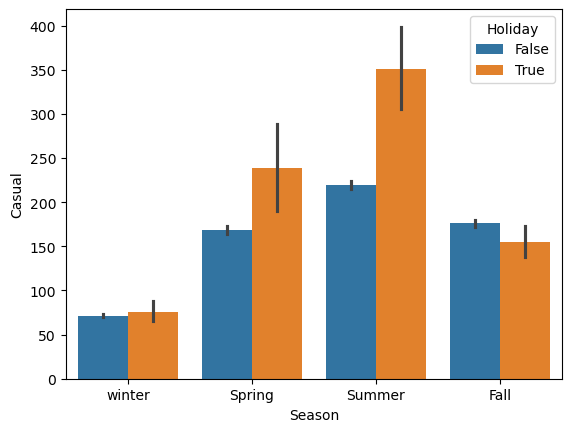

In [16]:
sns.barplot(dc_bike_hourly, x="Season", y="Casual", hue="Holiday")

<Axes: xlabel='Season', ylabel='Member'>

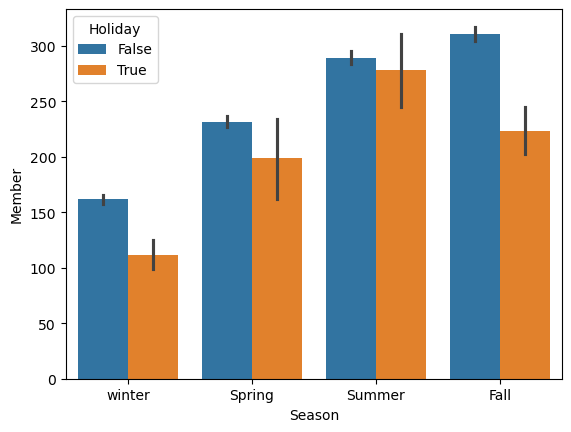

In [17]:
sns.barplot(dc_bike_hourly, x="Season", y="Member", hue="Holiday")

<Axes: xlabel='Date_dow_name', ylabel='Total_rides'>

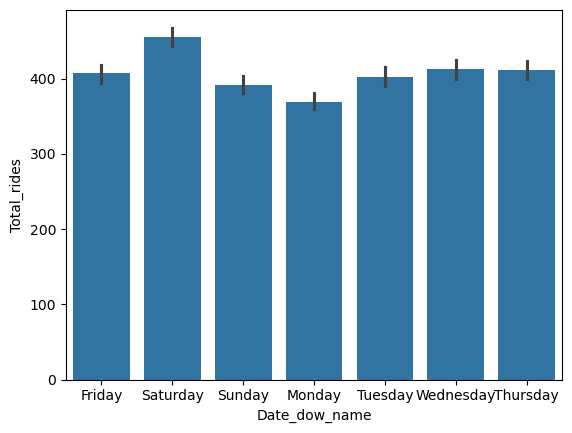

In [59]:
sns.barplot(dc_bike_hourly, x="Date_dow_name", y="Total_rides")

<Axes: xlabel='Date_year', ylabel='Total_rides'>

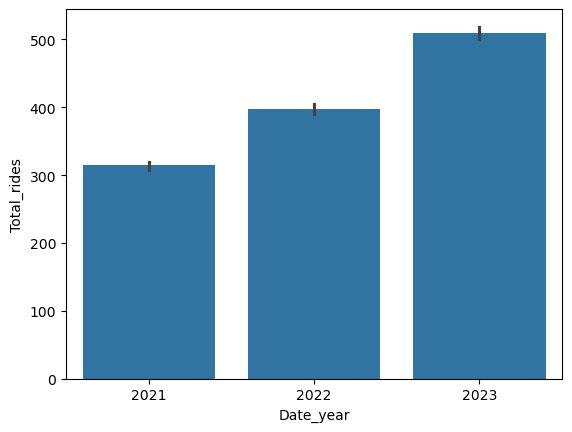

In [60]:
sns.barplot(dc_bike_hourly, x="Date_year", y="Total_rides")

<Axes: xlabel='Hour', ylabel='Total_rides'>

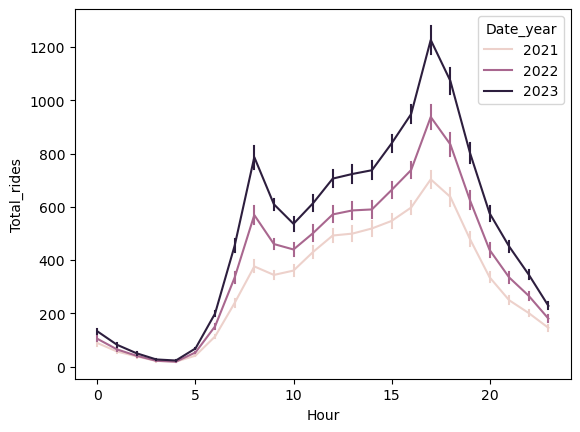

In [61]:
sns.lineplot(
    data=dc_bike_hourly, x="Hour", y="Total_rides", hue="Date_year", err_style="bars", errorbar=("se", 2),
)

<Axes: xlabel='Hour', ylabel='Total_rides'>

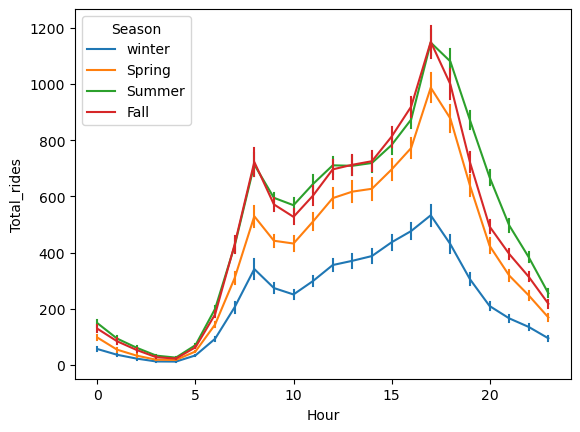

In [18]:
sns.lineplot(
    data=dc_bike_hourly, x="Hour", y="Total_rides", hue="Season", err_style="bars", errorbar=("se", 2),
)

<Axes: xlabel='Hour', ylabel='Total_rides'>

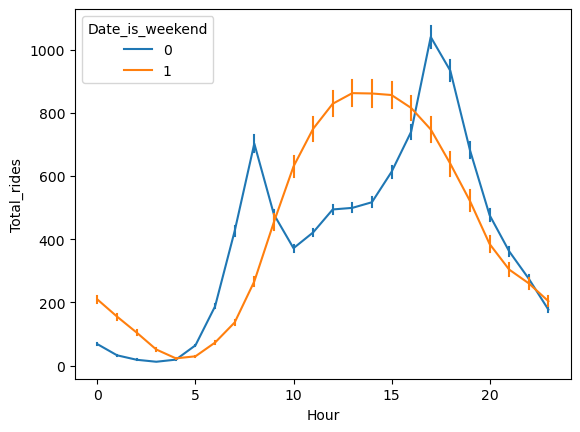

In [19]:
sns.lineplot(
    data=dc_bike_hourly, x="Hour", y="Total_rides", hue="Date_is_weekend", err_style="bars", errorbar=("se", 2),
)

<Axes: xlabel='relativehumidity_2m (%))', ylabel='Hour'>

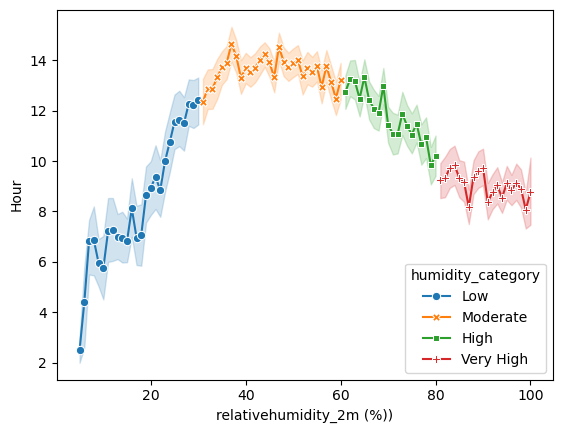

In [51]:
sns.lineplot(
    data=dc_bike_hourly,
    x="relativehumidity_2m (%))", y="Hour", hue="humidity_category", style="humidity_category",
    markers=True, dashes=False
)

<Axes: xlabel='Hour', ylabel='relativehumidity_2m (%)'>

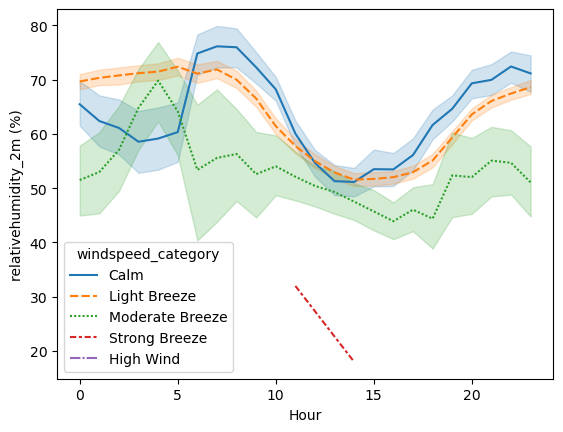

In [58]:
sns.lineplot(data=dc_bike_hourly, x="Hour", y='relativehumidity_2m (%)', hue="windspeed_category", style="windspeed_category")

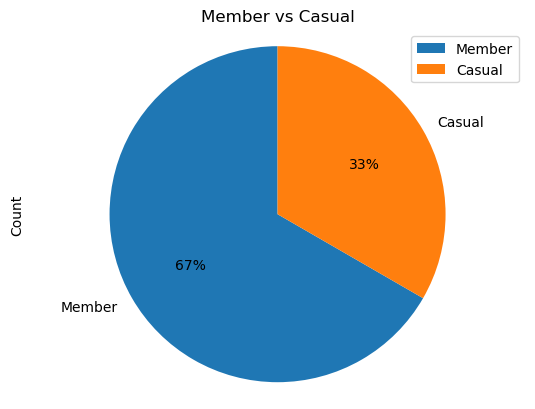

In [85]:
dc_bike_hourly = {'Category': ['Member', 'Casual'], 'Count': [100, 50]}
dc_bike_hourly = pd.DataFrame(dc_bike_hourly)

# Plotting the pie chart
dc_bike_hourly.plot(kind='pie', y='Count', labels=dc_bike_hourly['Category'], autopct='%1.0f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Member vs Casual')
plt.show()